# 02 Check existing waves in the data base

1) Import de las librerias que utilizaremos

In [1]:
import psycopg2
import numpy as np
import collections
import matplotlib.pyplot as plt

2) Conexion a la base de datos

In [2]:
conn = psycopg2.connect("dbname=mimic")
cur = conn.cursor()

3) Con cuantos archivos de ondas contamos

In [3]:
select_stament = 'select count(1) from waveformFields'
cur.execute(select_stament)
ondas = cur.fetchone()
select_stament = 'select count(distinct subject_id) from waveformFields'
cur.execute(select_stament)
pacientes = cur.fetchone()
print('Tenemos',ondas[0],'ondas de',pacientes[0],'pacientes')

Tenemos 23586 ondas de 10134 pacientes


4) De la ultima onda tomada del paciente, tomamos las señales

In [4]:
select_stament = 'SELECT lef.signame FROM waveformFields lef LEFT JOIN (SELECT MAX(recorddate) AS recorddate,subject_id FROM waveformFields GROUP BY subject_id) rig ON lef.subject_id = rig.subject_id AND lef.recorddate = rig.recorddate WHERE rig.subject_id IS NOT NULL ORDER BY lef.subject_id'
cur.execute(select_stament)

In [5]:
patient = []
for row in cur:
    patient += row[0]
#    np.concatenate((patient, np.array(row)))

Posibles Ondas que existen

In [6]:
labels, values = zip(*collections.Counter(patient).items())
print(labels)

('PLETH L', 'RESP', 'MCL1', 'FAP', 'MCL1+', 'PLETH R', 'IC2', 'aVR', '???', 'I', '[0]', '[5125]', 'ABP', 'IC1', 'AOBP', 'CO2', '[0]+', 'ECG', 'P1', 'AVL', 'II+', 'PLETHl', 'MCL', 'I+', 'LAP', 'AVF', 'UAP', 'aVF', '!', 'Ao', 'V', 'III', 'BAP', 'P4', 'II', '[0]+++', 'V+', 'III+', 'PLETH', 'PLETHr', '[0]++++', 'CVP', '[0]++', 'ICP', 'aVL', 'V1', 'RAP', 'PAP', 'AVR', 'Resp', 'ART', 'UVP')


Muestrame el top 15 de las Ondas mas comunes

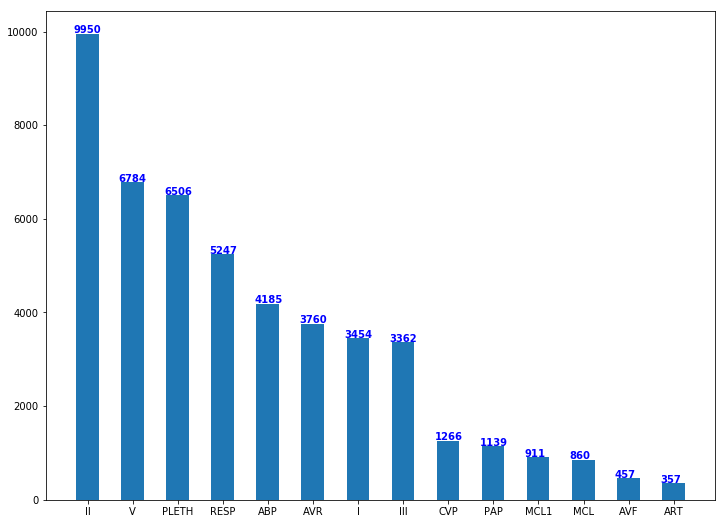

In [7]:
labels, values = zip(*collections.Counter(patient).most_common(14))
indexes = np.arange(len(labels))
width = 0.5
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots() 
for i, v in enumerate(values):
    ax.text(i-0.3,v+12, str(v), color='blue', fontweight='bold')
    
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)
plt.show()

In [8]:
select_stament = "SELECT count(distinct lef.subject_id) FROM waveformfields lef  LEFT JOIN (SELECT MAX(recorddate) AS recorddate,subject_id FROM waveformFields GROUP BY subject_id) rig ON lef.subject_id = rig.subject_id AND lef.recorddate = rig.recorddate WHERE rig.subject_id IS NOT NULL AND signame @> ARRAY['"+labels[0]+"']::varchar[]"
cur.execute(select_stament)
result = cur.fetchone()
print('Se hara el analisis sobre las ondas de tipo',labels[0],'porque son de las que mas tenemos',result[0],' muestras')

Se hara el analisis sobre las ondas de tipo II porque son de las que mas tenemos 9950  muestras


In [9]:
conn.close()